<a href="https://colab.research.google.com/github/aline-fortaleza/ProjMetodos/blob/main/P2_metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O impacto da utilização do teste rápido nos casos de COVID-19**

# Alunos:

Aline Fortaleza Ferreira da Silva (affs2@cin.ufpe.br)

Arthur Alves Marsaro (aam4@cin.ufpe.br)

Lucas da Silveira Absalão (lsa4@cin.ufpe.br)

Pedro Victor Saraiva Campello (pvsc@cin.ufpe.br)

# Resumo:
Nesse projeto, propomos realizar uma análise detalhada do impacto da utilização de testes rápidos para Covid-19, analisando parâmetros e variáveis definidas. A pesquisa terá como base o estudo da população através do modelo SEIQR, uma modificação do SIR. Ademais, buscou-se avaliar as diferenças do uso dos testes rápidos no Canadá e no Brasil.


#Introdução:
    
  Com o surgimento de um novo modelo de coronavírus chamado COVID-19, houve o crescimento do número de testes rápidos
para a investigação da população, analisando a ocorrência dos casos e da sua propapação.No início da pandemia, devido à limitação de
recursos médicos e tecnologia de diagnóstico, a pandemia ceifou a vida de muitas pessoas. Mesmo com tratamentos mais refinados
e procedimentos de testes atuais, a pandemia ainda representa um enorme risco para a saúde pública, impedindo as pessoas de
regressar à escola ou ao local de trabalho.
   Ademais, o teste PCR (teste de reação em cadeia da polimerase) é amplamente confiável para identificar com precisão infecções por SARSCoV-2. Apesar da confiabilidade, leva de 1 a 3 dias para receber o resultado. Testes rápidos, que
detectam anticorpos, foram desenvolvidos para fornecer uma maneira mais rápida e barata de detectar casos de COVID. Como o nome
sugere, o teste pode ser realizado em casa e entregar os resultados em 15 minutos. Embora isso possa vir com um empecilho
por causa da desvantagem de menor precisão, ainda tem o potencial de reduzir significativamente a propagação da pandemia.Segundo dados da Secretaria de Vigilância em Saúde (SVS), 32.293.424 testes RT-PCR, mais 25.210.210 swabs usados para coleta de amostras suspeitas foram distribuídos aos estados e ao Distrito Federal até o início de dezembro. Já os de testes rápidos somam 70 milhões pelo Plano Nacional de Testagem, demonstrando uma diferença de quase 20 milhões dos tipos de testes, o que infere uma maior praticidade na execução dos testes rápidos, ressaltando sua importância.


   Assim, com a presença de tais problemáticas, procuramos em nossa proposta utlizar o chamado modelo SIR para realizar nossos estudos e análises, sendo que tal modelo
propõe a divisão da população em três compartimentos: S
(suscetível), I (infeccioso) e R (recuperado) .Entretanto, realizamos algumas modificações cruciais no modelo para obter uma simulação mais verossímil.Portanto, utilizando o modelo SIR modificado, ou seja, considerando demais aspectos para tornar o modelo o mais próximo da
realidade, buscamos nesse projeto retratar como os testes rápidos impactaram no compartamento populacional.
  Para a melhoria da descrição e investigação da problemática retratada, foram adicionadas algumas outras divisões dentro do modelo SIR original.Dentre essas novas divisões, houve a adição de dois novos grupos, os quais são representados pelas letras "E" e "Q".
   Primeiramente, o grupo representado pela letra "E" é designado como a parcela que representa as pessoas ditas como "Expostas", ou seja, são indivíduos infectados mas que não apresentam um caráter contagioso, logo, são membros que estão no chamado "Período Latente".
   Por fim, os representantes da letra "Q" são definidos como o grupo dos "Em estado de quarentena", portanto, são integrantes que testaram positivo para o vírus e estão de quarentena em suas residências ou, também, pessoas sintomáticas que se auto-isolaram.
  Logo, com a ajuda de um modelo matemático pré-determinado, procuramos estudar os impactos na população de forma generalizada e em suas parcelas específicas, entendendo
 quais fatores podem ser mais determinantes e cruciais para a propagação do vírus no contexto pandêmico.
  


#Objetivos:
*   O principal objetivo do projeto é compreender, a partir de um modelo matemático, como diferentes fatores afetaram a disseminação da COVID-19 no Canadá e no Brasil.
*   A partir dos resultados obtidos, procura-se estabelecer qual parcela da população necessita de testes rápidos para causar um real impacto na disseminação do vírus.






#Mapa mental:

[Mapa Mental no Coggle](https://coggle.it/diagram/ZXnKcbkKNm0pkKmZ/t/-/d7fb7c9e74c3c0b5651c62e37d34d8413547f5e32663074d9ec1dcd78b2658b6)

#Modelo:


A análise abaixo foi desenvolvida para o modelo proposto no artigo, a população do Canadá no período do inicio de 2020 até o primeiro trimestre de 2021. Usaremos esse modelo como base para as análises propostas abaixo que levarão em conta a população brasileira no mesmo período.

O modelo é baseado em 5 equações, um para cada grupo de pessoas listado:

S - "Suscetível", pessoas que podem ser infectadas pelo vírus

E - "Exposto", pessoas que foram infectadas mas ainda não estão contagiosas

I - "Infectados", pessoas infectadas e que estão contagiosas

Q - "Quarentenados", pessoas quarentenadas

R - "Recuperados", pessoas recuperadas (no nosso modelo não consideramos reinfecção)

Equações utilizadas na modelagem:


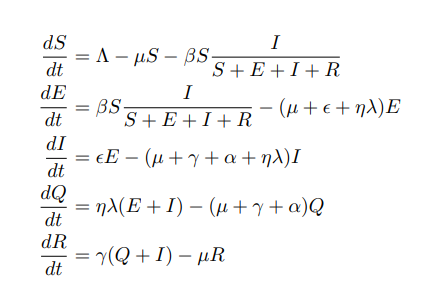




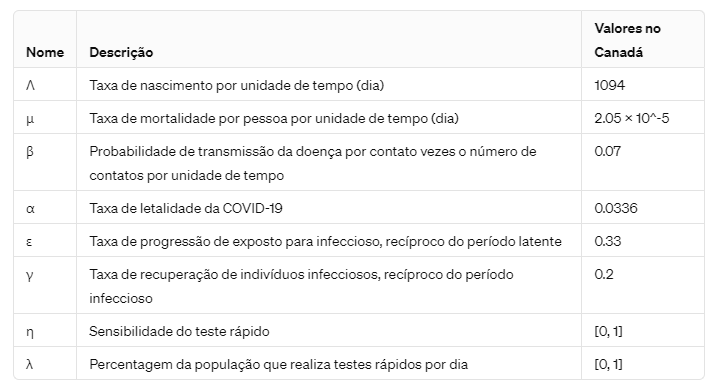




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import odeint

In [ ]:
# The SEIQR model differential equations.
def deriv(y, t, N, beta, gamma,mi,lambda_m,alfa,epsilon,Lambda,eta):
    S, E, I, Q, R = y
    dSdt = Lambda - mi*S -(beta*S*I/(S+E+I+R)) #Suscetível
    dEdt = (beta*S*I/(S+E+I+R)) -(mi+epsilon+(eta*lambda_m))*E #Exposto
    dIdt = epsilon*E-(mi+gamma+alfa+(eta*lambda_m))*I #Infectados
    dQdt = eta*lambda_m*(E+I)-(mi+gamma+alfa)*Q #Quarentenados
    dRdt= gamma*(Q+I)-mi*R #Recuperados
    return dSdt, dEdt,dIdt,dQdt,dRdt

In [ ]:
    N = 38050000 #População total no Canadá
    I0 = 1000    #Quantidade de pessoas infectadas inicialmente
    R0 = 0    #Quantidade de pessoas recuperadas
    S0 = N - I0 - R0     #Pessoas suscetíveis (partindo do pressuposto que uma pessoa recuperada não pegará a doença novamente)
    Q0 = 0   #Pessoas quarentenadas
    E0 = 1000   #Pessoas expostas -> infectadas mas ainda não transmitem o vírus (período latente)



    Lambda =  1094          # Taxa de nascimento por unidade de tempo (dia)
    mi = 0.0000205                # Taxa de morte por unidade de tempo (dia)
    alfa = 0.0336                 # Taxa de fatalidade da COVID no Canadá
    lambda_m = 0.3                # Porcentagem da população que fez testes rápidos
    eta = 0.85                     # Sensibilidade do teste rápido
    beta = 0.07                   # Probabilidade de transmissão de doença por contato multiplicado pela quantidade de contatos que um indivíduo faz por dia
    epsilon = 0.33                # Taxa de progressão de exposto para infeccioso
    gamma = 0.2                   # Taxa de recuperação de indivíduos infecciosos
    t = np.linspace(0, 200,200)  # De 0 a 365 dias

    y0 = S0, E0, I0, Q0, R0
    #Integrando as equações sobre o tempo t
    ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, lambda_m, alfa, epsilon, Lambda, eta))
    S, E, I, Q, R = ret.T

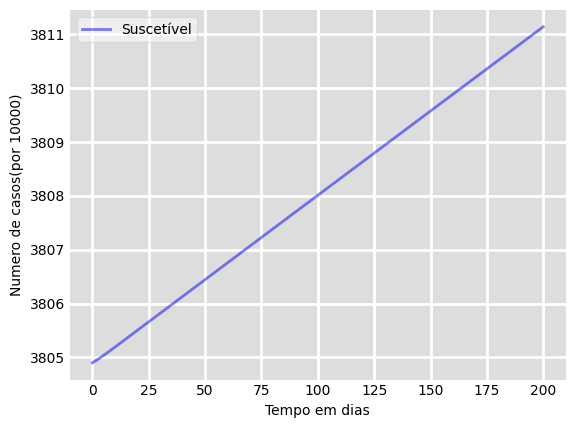

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
t = np.linspace(0, 200, 200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Suscetível')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos(por 10000)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
     ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

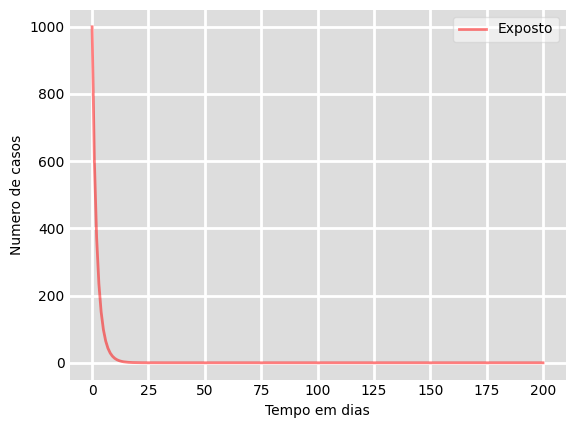

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, E, 'r', alpha=0.5, lw=2, label='Exposto')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

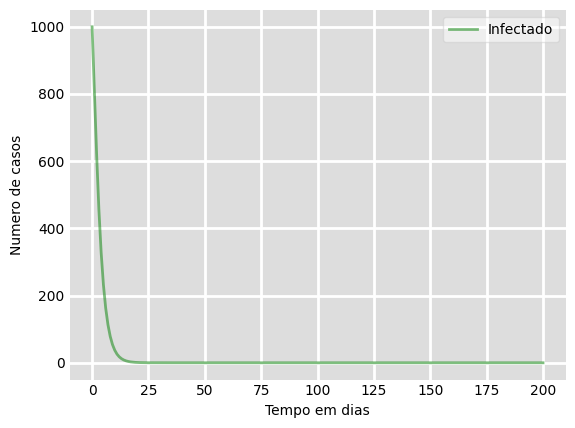

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Infectado')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

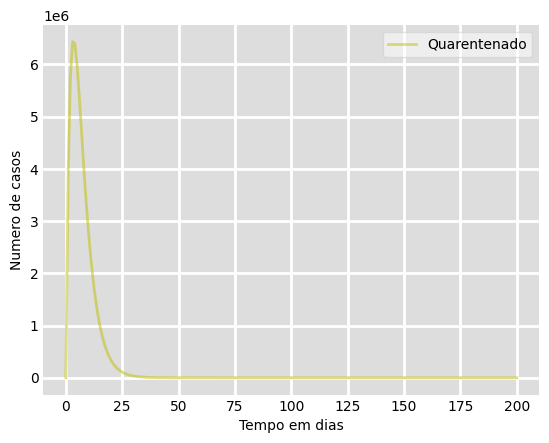

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Q * 10000, 'y', alpha=0.5, lw=2, label='Quarentenado')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

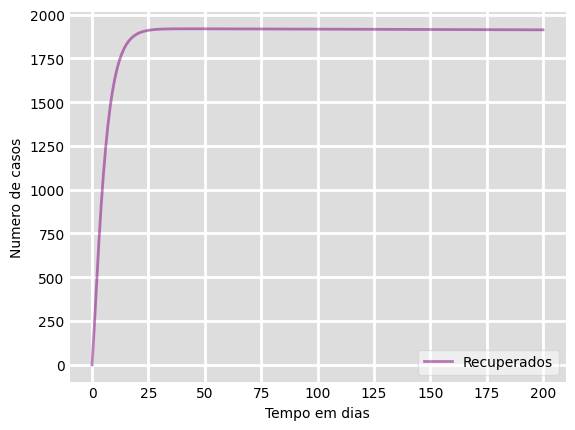

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R, color = 'purple', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

# Análise no Brasil

Vamos considerar a população brasileira no ano de 2020, que era de **213,2 milhões** de brasileiros, conforme informações do Departamento do Censo dos Estados Unidos. A taxa de letalidade do COVID-19 no mesmo ano foi de **0,025**, conforme dados do Sistema Único de Saúde (SUS). A taxa de natalidade, de acordo com o Jornal da USP, foi de **7474 por dia**, enquanto a taxa de mortalidade, segundo o Instituto Brasileiro de Geografia e Estatística (IBGE), foi de **0,0019**. Todos os outros parâmetros mencionados foram extraídos do próprio artigo, uma vez que se referem exclusivamente à doença em questão.

In [ ]:
    N = 213200000 #População total no Brasil
    I0 = 1000    #Quantidade de pessoas infectadas inicialmente
    R0 = 0    #Quantidade de pessoas recuperadas
    S0 = N - I0 - R0     #Pessoas suscetíveis (partindo do pressuposto que uma pessoa recuperada não pegará a doença novamente)
    Q0 = 0   #Pessoas quarentenadas
    E0 = 1000   #Pessoas expostas -> infectadas mas ainda não transmitem o vírus (período latente)


    Lambda =  7474          # Taxa de nascimento por unidade de tempo (dia)
    mi = 0.0000194                # Taxa de morte por unidade de tempo (dia)
    alfa = 0.025                 # Taxa de fatalidade da COVID no Brasil
    lambda_m = 0.3                # Porcentagem da população que fez testes rápidos por dia
    eta = 0.85                     # Sensibilidade do teste rápido
    beta = 0.07                   # Probabilidade de transmissão de doença por contato multiplicado pela quantidade de contatos que um indivíduo faz por dia
    epsilon = 0.33                # Taxa de progressão de exposto para infeccioso
    gamma = 0.2                   # Taxa de recuperação de indivíduos infecciosos
    t = np.linspace(0, 200,200)  # De 0 a 200 dias

    y0 = S0, E0, I0, Q0, R0
    #Integrando as equações sobre o tempo t
    ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, lambda_m, alfa, epsilon, Lambda, eta))
    S, E, I, Q, R = ret.T


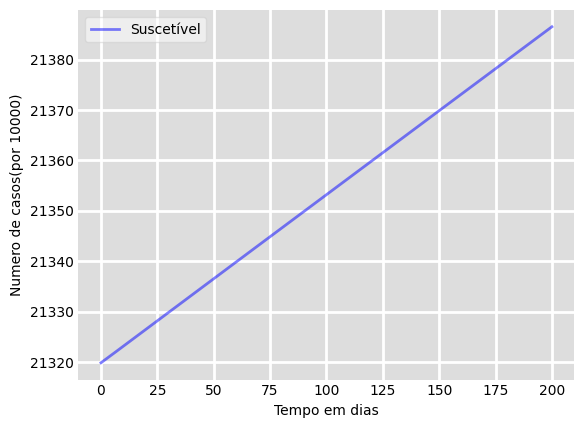

In [ ]:
# Representação gráfica para pessoas Suscetíveis
t = np.linspace(0, 200, 200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Suscetível')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos(por 10000)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
     ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

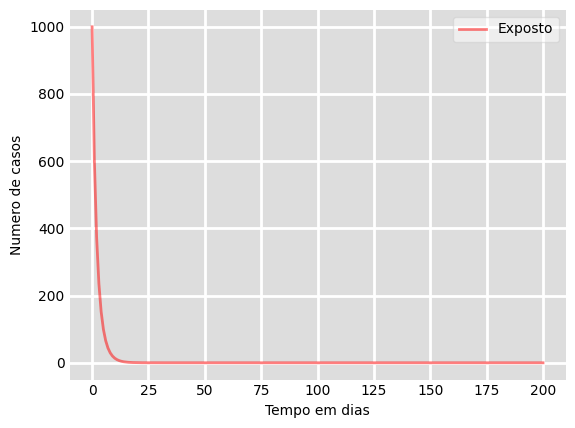

In [ ]:
# Representação gráfica para pessoas expostas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, E, 'r', alpha=0.5, lw=2, label='Exposto')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

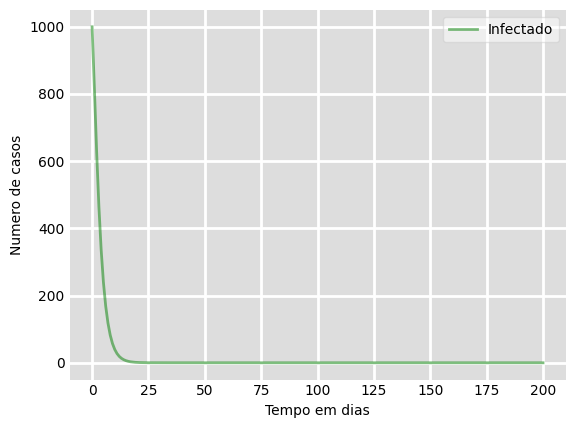

In [ ]:
# Representação gráfica para pessoas infectadas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Infectado')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

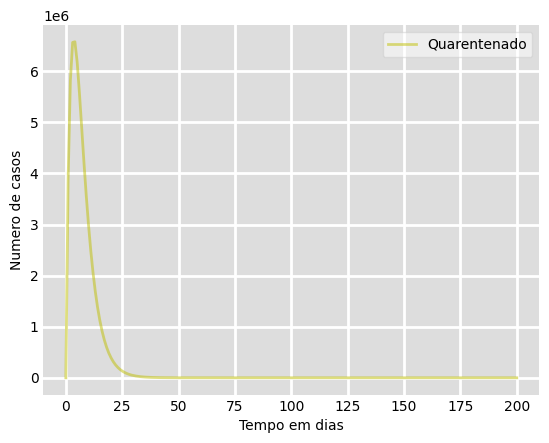

In [ ]:
# Representação gráfica para pessoas em quarentena
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Q * 10000, 'y', alpha=0.5, lw=2, label='Quarentenado')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

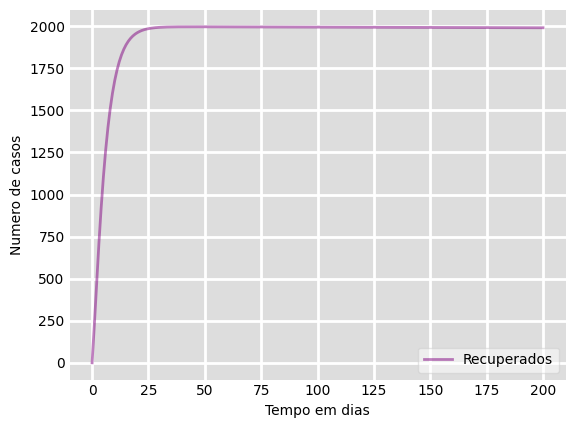

In [ ]:
# Representação gráfica para pessoas recuperadas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R, color = 'purple', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

# Análise da eficácia dos testes rápidos

Nos gráficos abaixo, analisaremos como uma possível mudança dos parâmetros eta(eficiência dos testes rápidos) e lambda_m(porcentagem da população testada por dia) poderiam mudar o contexto da pandemia no país.

Pra isso iremos definir uma nova variável K = eta * lambda_m, observando a mudança dos gráficos.

In [ ]:
# SEIQR com K = eta*lambda_m
def deriv(y, t, N, beta, gamma,mi,alfa,epsilon,Lambda,K):
    S, E, I, Q, R = y
    dSdt = Lambda - mi*S -(beta*S*I/(S+E+I+R)) #Suscetível
    dEdt = (beta*S*I/(S+E+I+R)) -(mi+epsilon+(K))*E #Exposto
    dIdt = epsilon*E-(mi+gamma+alfa+(K))*I #Infectados
    dQdt = K*(E+I)-(mi+gamma+alfa)*Q #Quarentenados
    dRdt= gamma*(Q+I)-mi*R #Recuperados
    return dSdt, dEdt,dIdt,dQdt,dRdt

In [ ]:
    N = 213200000 #População total no Brasil
    I0 = 1000    #Quantidade de pessoas infectadas inicialmente
    R0 = 0    #Quantidade de pessoas recuperadas
    S0 = N - I0 - R0     #Pessoas suscetíveis (partindo do pressuposto que uma pessoa recuperada não pegará a doença novamente)
    Q0 = 0   #Pessoas quarentenadas
    E0 = 1000   #Pessoas expostas -> infectadas mas ainda não transmitem o vírus (período latente)


    Lambda =  7474          # Taxa de nascimento por unidade de tempo (dia)
    mi = 0.0000194                # Taxa de morte por unidade de tempo (dia)
    alfa = 0.025                 # Taxa de fatalidade da COVID no Brasil
    beta = 0.07                   # Probabilidade de transmissão de doença por contato multiplicado pela quantidade de contatos que um indivíduo faz por dia
    epsilon = 0.33                # Taxa de progressão de exposto para infeccioso
    gamma = 0.2                   # Taxa de recuperação de indivíduos infecciosos
    t = np.linspace(0, 200,200)  # De 0 a 200 dias
    K = 1

    y0 = S0, E0, I0, Q0, R0
    #Integrando as equações sobre o tempo t
    ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, K))
    S, E, I, Q, R = ret.T


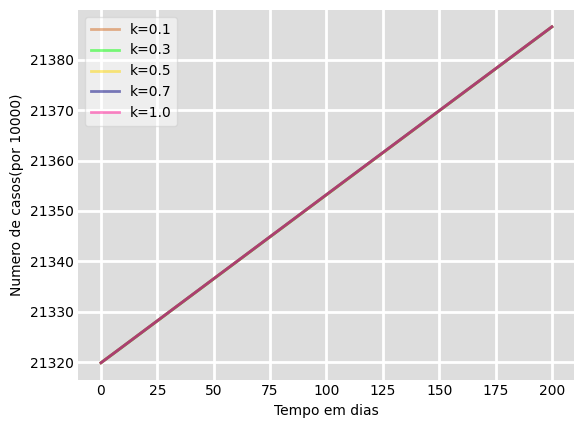

In [ ]:
# Representação gráfica para pessoas Suscetíveis
t = np.linspace(0, 200, 200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'chocolate', alpha=0.5, lw=2, label='k=0.1')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.1))
S, E, I, Q, R = ret.T
ax.plot(t, S/10000, 'lime', alpha=0.5, lw=2, label='k=0.3')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.3))
S, E, I, Q, R = ret.T
ax.plot(t, S/10000, 'gold', alpha=0.5, lw=2, label='k=0.5')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.5))
S, E, I, Q, R = ret.T
ax.plot(t, S/10000, 'navy', alpha=0.5, lw=2, label='k=0.7')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.7))
S, E, I, Q, R = ret.T
ax.plot(t, S/10000, 'deeppink', alpha=0.5, lw=2, label='k=1.0')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 1))
S, E, I, Q, R = ret.T
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos(por 10000)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
     ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

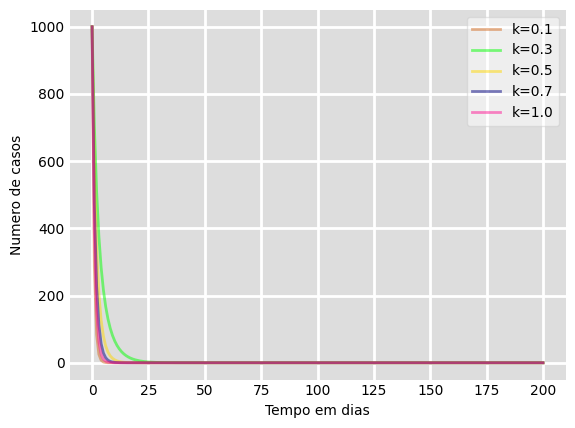

In [ ]:
# Representação gráfica para pessoas expostas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, E, 'chocolate', alpha=0.5, lw=2, label='k=0.1')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.1))
S, E, I, Q, R = ret.T
ax.plot(t, E, 'lime', alpha=0.5, lw=2, label='k=0.3')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.3))
S, E, I, Q, R = ret.T
ax.plot(t, E, 'gold', alpha=0.5, lw=2, label='k=0.5')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.5))
S, E, I, Q, R = ret.T
ax.plot(t, E, 'navy', alpha=0.5, lw=2, label='k=0.7')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.7))
S, E, I, Q, R = ret.T
ax.plot(t, E, 'deeppink', alpha=0.5, lw=2, label='k=1.0')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 1))
S, E, I, Q, R = ret.T
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

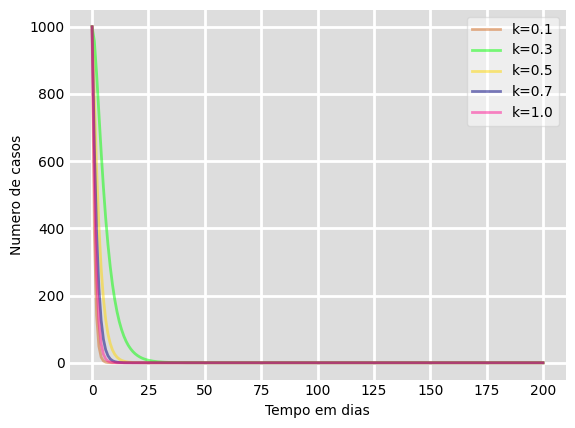

In [ ]:
# Representação gráfica para pessoas infectadas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'chocolate', alpha=0.5, lw=2, label='k=0.1')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.1))
S, E, I, Q, R = ret.T
ax.plot(t, I, 'lime', alpha=0.5, lw=2, label='k=0.3')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.3))
S, E, I, Q, R = ret.T
ax.plot(t, I, 'gold', alpha=0.5, lw=2, label='k=0.5')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.5))
S, E, I, Q, R = ret.T
ax.plot(t, I, 'navy', alpha=0.5, lw=2, label='k=0.7')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.7))
S, E, I, Q, R = ret.T
ax.plot(t, I, 'deeppink', alpha=0.5, lw=2, label='k=1.0')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 1))
S, E, I, Q, R = ret.T
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

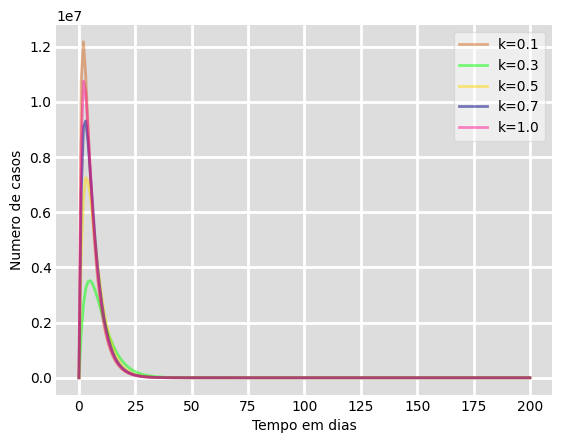

In [ ]:
# Representação gráfica para pessoas em quarentena
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Q*10000, 'chocolate', alpha=0.5, lw=2, label='k=0.1')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.1))
S, E, I, Q, R = ret.T
ax.plot(t, Q*10000, 'lime', alpha=0.5, lw=2, label='k=0.3')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.3))
S, E, I, Q, R = ret.T
ax.plot(t, Q*10000, 'gold', alpha=0.5, lw=2, label='k=0.5')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.5))
S, E, I, Q, R = ret.T
ax.plot(t, Q*10000, 'navy', alpha=0.5, lw=2, label='k=0.7')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.7))
S, E, I, Q, R = ret.T
ax.plot(t, Q*10000, 'deeppink', alpha=0.5, lw=2, label='k=1.0')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 1))
S, E, I, Q, R = ret.T
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

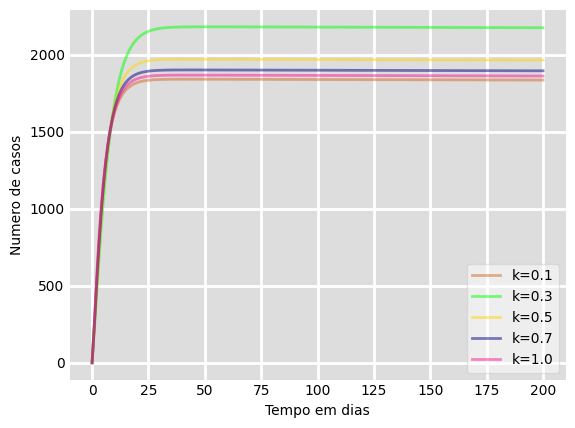

In [ ]:
# Representação gráfica para pessoas recuperadas
t = np.linspace(0, 200,200)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R, 'chocolate', alpha=0.5, lw=2, label='k=0.1')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.1))
S, E, I, Q, R = ret.T
ax.plot(t, R, 'lime', alpha=0.5, lw=2, label='k=0.3')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.3))
S, E, I, Q, R = ret.T
ax.plot(t, R, 'gold', alpha=0.5, lw=2, label='k=0.5')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.5))
S, E, I, Q, R = ret.T
ax.plot(t, R, 'navy', alpha=0.5, lw=2, label='k=0.7')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 0.7))
S, E, I, Q, R = ret.T
ax.plot(t, R, 'deeppink', alpha=0.5, lw=2, label='k=1.0')
ret =  odeint(deriv, y0, t, args=(N ,beta, gamma, mi, alfa, epsilon, Lambda, 1))
S, E, I, Q, R = ret.T
ax.set_xlabel('Tempo em dias')
ax.set_ylabel('Numero de casos')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
plt.savefig('graph.pdf')
plt.show()

#Resultados/Discussão:

Analisando os resultados obtidos, tanto do Canadá quanto o do Brasil, é perceptível que ambos apresentam em seus gráficos um comportamento semelhante, mesmo sendo localidades diferentes. Corrobora-se isso porque além do modelo ser o mesmo, também tem o fato de que nesse estudo foi considerado que a sensibilidade dos testes utilizados no Canadá e no Brasil serem as mesmas, no caso a taxa ideal de 0,85. Além disso, tal simetria pode ser justificada pelo modelo, mesmo por considerar diferentes taxas de mortalidade e de natalidade, tamanho da população e taxa de letalidade do COVID-19, não está considerando todas as individualidades da sociedade de ambas as nações, como exemplo os sistemas de saúde de cada uma e diferente distribuição etária e demográfica das populações.

#Conclusão:
De acordo a análise, pode-se concluir que mesmo que a adaptação do modelo SIR para o modelo SEIQR trouxe resultados mais precisos ao comportamento particular do vírus da COVID-19, esse paradigma ainda se mostra insuficiente para analisar o cenário proposto pela testagem rápida em massa. Em certos momentos do ano, a população brasileira se mostra menos propícia a realizar a testagem e por consequência entrar em quarentena como no carnaval e nas festas de fim de ano. Assim, é necessário uma análise mais profunda de certas situações  para entender melhor no que resultaria a conjuntura da testagem na sociedade do Brasil. Tal estudo será realizado posteriormente na segunda entrega do projeto.

# Referências:

[Rapid Testing in COVID and Modified SIR Model](https://www.siam.org/Portals/0/Publications/SIURO/Vol15/S146039RR.pdf?ver=2022-10-04-102909-387)

[Modelo SIR Tradicional](https://rce.casadasciencias.org/rceapp/art/2017/020/)

[Dados do Governo Federal sobre o covid-19 no Brasil](https://infoms.saude.gov.br/extensions/covid-19_html/covid-19_html.html)

[Dados sobre o uso de testes rápidos e PCR's durante a pandemia no Brasil](https://www.gov.br/saude/pt-br/assuntos/noticias/2022/dezembro/ministerio-da-saude-distribuiu-mais-de-102-milhoes-de-testes-de-covid-19#:~:text=Segundo%20dados%20da%20Secretaria%20de,pelo%20Plano%20Nacional%20de%20Testagem.)

[Óbitos e nascimentos no Brasil](https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/32270-registro-civil-2020-numero-de-registros-de-obitos-cresce-14-9-e-o-de-nascimentos-cai-4-7#:~:text=A%20regi%C3%A3o%20Norte%20tem%20a,tinham%20menos%20de%2020%20anos.&text=O%20n%C3%BAmero%20total%20de%20%C3%B3bitos,2020%20foi%20de%201.513.575.)

[Queda da taxa de natalidade](https://jornal.usp.br/radio-usp/ibge-registra-queda-da-taxa-de-natalidade-no-brasil/#:~:text=Na%20d%C3%A9cada%20de%2060%2C%20por,m%C3%A9dia%20de%201%2C65%20filhos.)



